In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [18]:
data = pd.read_csv('/content/sample_data/Google_train_data.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [19]:
data.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [4]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [6]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [7]:
X_train = []
y_train = []

for i in range (60,1149): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0])
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [8]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1089, 60, 1)

In [9]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [10]:
hist = model.fit(X_train, y_train, epochs = 5, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 16s - loss: 0.0334 - 16s/epoch - 463ms/step
Epoch 2/20
35/35 - 7s - loss: 0.0110 - 7s/epoch - 190ms/step
Epoch 3/20
35/35 - 7s - loss: 0.0098 - 7s/epoch - 211ms/step
Epoch 4/20
35/35 - 7s - loss: 0.0083 - 7s/epoch - 190ms/step
Epoch 5/20
35/35 - 8s - loss: 0.0069 - 8s/epoch - 234ms/step
Epoch 6/20
35/35 - 6s - loss: 0.0077 - 6s/epoch - 180ms/step
Epoch 7/20
35/35 - 8s - loss: 0.0065 - 8s/epoch - 217ms/step
Epoch 8/20
35/35 - 6s - loss: 0.0064 - 6s/epoch - 180ms/step
Epoch 9/20
35/35 - 8s - loss: 0.0075 - 8s/epoch - 217ms/step
Epoch 10/20
35/35 - 6s - loss: 0.0055 - 6s/epoch - 181ms/step
Epoch 11/20
35/35 - 10s - loss: 0.0058 - 10s/epoch - 284ms/step
Epoch 12/20
35/35 - 8s - loss: 0.0056 - 8s/epoch - 221ms/step
Epoch 13/20
35/35 - 7s - loss: 0.0063 - 7s/epoch - 209ms/step
Epoch 14/20
35/35 - 7s - loss: 0.0058 - 7s/epoch - 186ms/step
Epoch 15/20
35/35 - 7s - loss: 0.0055 - 7s/epoch - 210ms/step
Epoch 16/20
35/35 - 7s - loss: 0.0052 - 7s/epoch - 186ms/step
Epoch 17/20
3

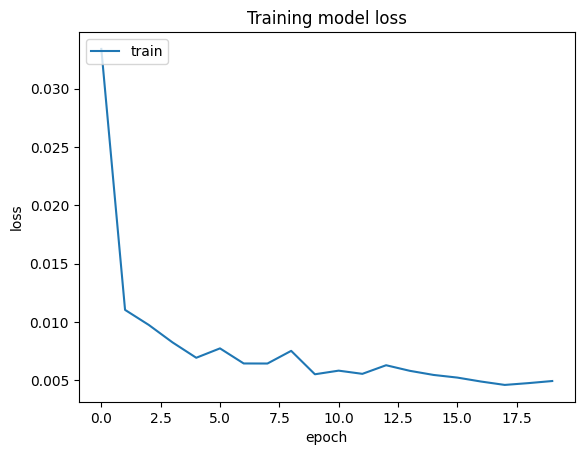

In [24]:
plt.plot( hist.history['loss'] )
plt.title( 'Training model loss' )
plt.ylabel( 'loss' )
plt.xlabel( 'epoch' )
plt.legend( ['train'], loc='upper left' )
plt.show( )

In [25]:
testData = pd.read_csv('/content/sample_data/Google_test_data.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values


#input array for the model
inputClosing = testData.iloc[:,0:].values
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [14]:
y_pred = model.predict(X_test)
y_pred

6/6 [==============================] - 2s 99ms/step


array([[1.3425963],
       [1.345537 ],
       [1.3577052],
       [1.375636 ],
       [1.3893319],
       [1.3876048],
       [1.3716317],
       [1.3508253],
       [1.3380395],
       [1.3354267],
       [1.3293171],
       [1.3183292],
       [1.3084267],
       [1.299185 ],
       [1.2977821],
       [1.3033323],
       [1.3234497],
       [1.354269 ],
       [1.3885493],
       [1.4215233],
       [1.4327989],
       [1.4264487],
       [1.4020792],
       [1.3693602],
       [1.3412925],
       [1.3269622],
       [1.325908 ],
       [1.3282895],
       [1.3226252],
       [1.3119992],
       [1.2994486],
       [1.2848074],
       [1.2627689],
       [1.2357061],
       [1.2253399],
       [1.236786 ],
       [1.261588 ],
       [1.2888186],
       [1.3134105],
       [1.3242229],
       [1.3349473],
       [1.3487839],
       [1.3657819],
       [1.3819569],
       [1.392768 ],
       [1.3934646],
       [1.3823448],
       [1.3728588],
       [1.3710742],
       [1.3787462],


In [15]:
predicted_price = sc.inverse_transform(y_pred)

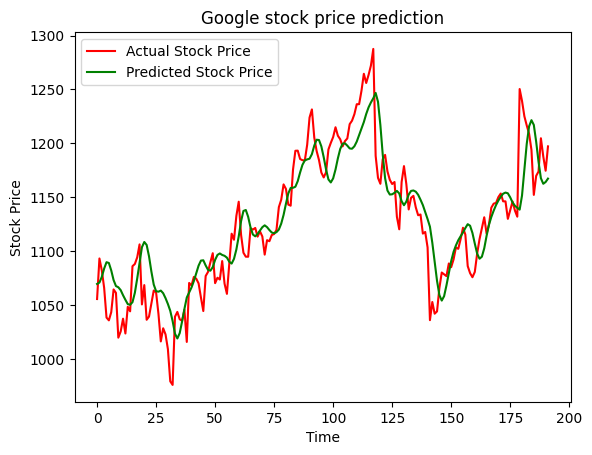

In [17]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()